# 4.9 다중 서브플롯

- 하나의 그림 내에 공존할 수 있는 더 작은 축의 그룹

### plt.axes: 직접 만든 서브플롯

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

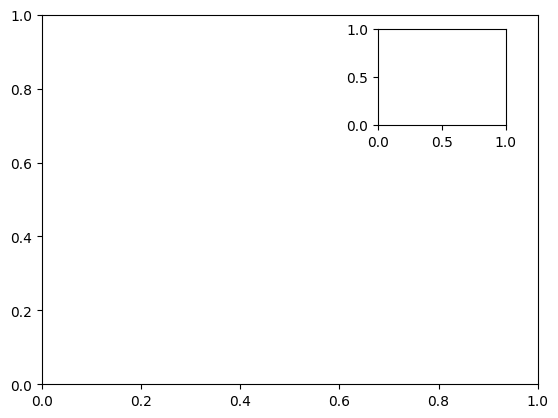

In [2]:
ax1=plt.axes()
ax2=plt.axes([0.65,0.65,0.2,0.2]) #축의 크기는 그림 너비와 높이의 각 20%가 된다

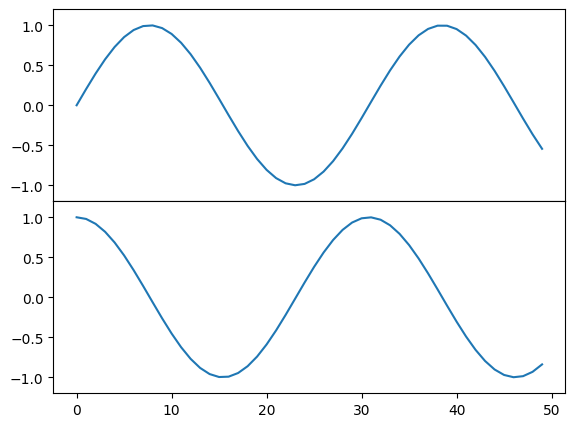

In [3]:
fig=plt.figure()
ax1= fig.add_axes([0.1,0.5,0.8,0.4], xticklabels=[], ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))
x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

### plt.subplot: 간단한 서브플롯의 그리드

- 그리드 안에 하나의 서브프롯 만들음

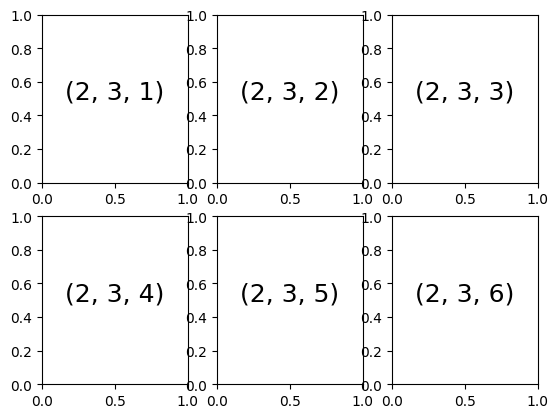

In [6]:
for i in range(1,7):
    plt.subplot(2,3,i) #행 개수. 열 개수. 플로스이 인덱스
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18, ha='center')

#### plt.subplots: 한 번에 전체 그리드 만들기

행과 열의 개수와 함께 선택적으로 서로 다른 축과의 관계 지정하는 sharex와 sharey

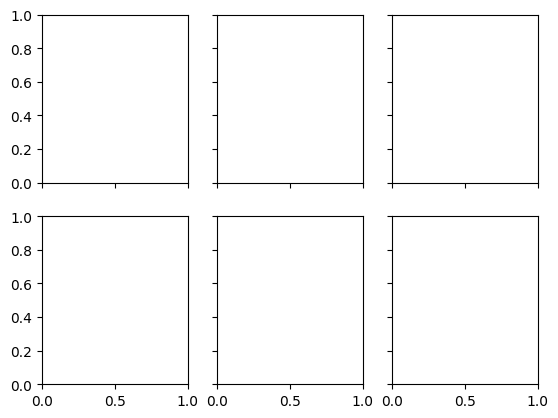

In [7]:
fig,ax=plt.subplots(2,3,sharex='col', sharey='row')

이때, 축이 2차원 배열 안에 있어 [행, 열]로 인덱싱할 수 있음

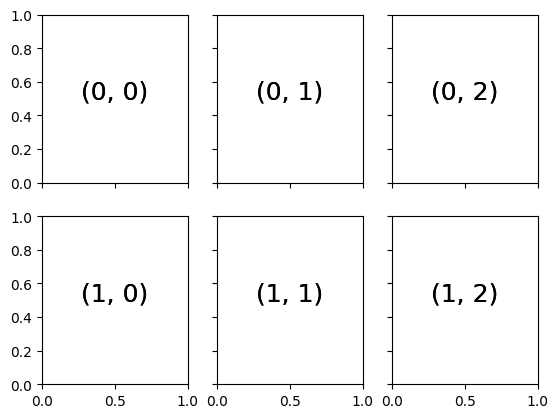

In [10]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)), fontsize=18, ha='center')
fig

#### plt.GridSpec: 복잡한 배치

<Axes: >

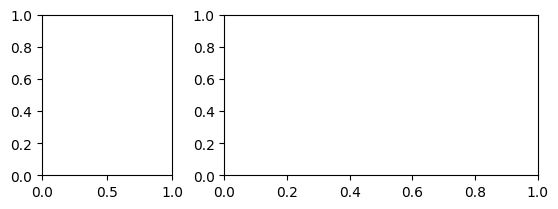

In [12]:
grid=plt.GridSpec(2,3,wspace=0.4, hspace=0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])

### 축 히스토그램 만들기

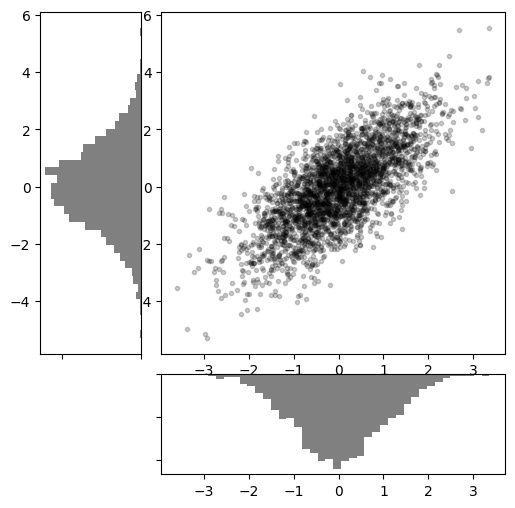

In [19]:
#정규분포 데이터 만들기
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,3000).T

#gridspec으로 축 설정하기
fig=plt.figure(figsize=(6,6))
grid=plt.GridSpec(4,4,hspace=0.2, wspace=0.2)
main_ax=fig.add_subplot(grid[:-1,1:])
y_hist=fig.add_subplot(grid[:-1,0], xticklabels=[],sharey=main_ax)
x_hist=fig.add_subplot(grid[-1,1:], yticklabels=[],sharex=main_ax)

#메인 축에 점 산포하기
main_ax.plot(x,y,'ok', markersize=3, alpha=0.2)

#보조 축상에 히스토그램 만들기
x_hist.hist(x,40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()

#### 텍스트와 주석_ 미국 출생류로가 휴일 데이터

In [ ]:
births=pd.read_csv("C:/Users/JS/Desktop/2024_2 쿠다/시각화 스터디/births.csv")
quartiles=np.percentile(births['births'],[25,50,75])
mu,sig=quartiles[1],0.74*(quartiles[2]-quartiles[0])
births=births.query('(births>@mu -5* @sig) & (births<@mu +5 *@sig)')
births['day']=births['day'].astype(int)
births.index=pd.to_datetime(10000*births.year + 100*births.month + births.day, format='%y%m%d')
births_by_date= births.pivot_table('births', [births.index.month,births.index.day])
births_by_dae.index=[pd.datetime(2012,month,day) for (month,day) in births_by_date.index]

fig, ax= plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)


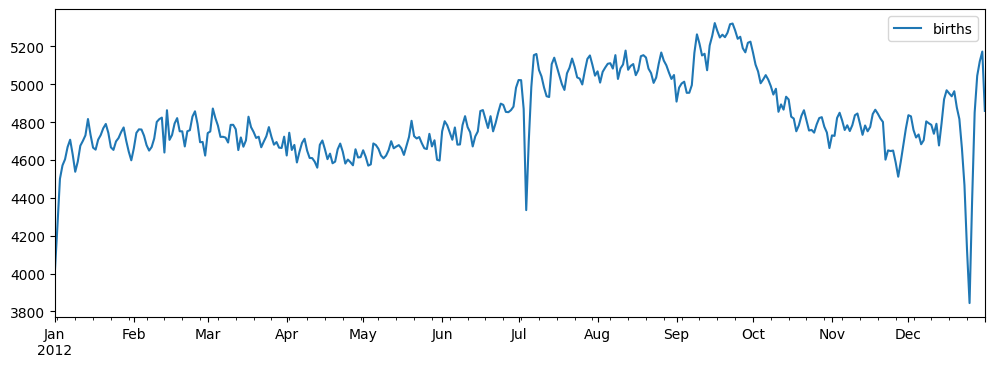

In [25]:

import datetime

# CSV 읽기
births = pd.read_csv("C:/Users/JS/Desktop/2024_2 쿠다/시각화 스터디/births.csv")

# 사분위수 계산
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

# 이상치 제거
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

# 날짜 인덱스 설정
births['date'] = pd.to_datetime(births[['year', 'month', 'day']])
births.set_index('date', inplace=True)

# 날짜별 출생 pivot 테이블
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [
    datetime.datetime(2012, month, day) for (month, day) in births_by_date.index
]

# 시각화
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)
plt.show()


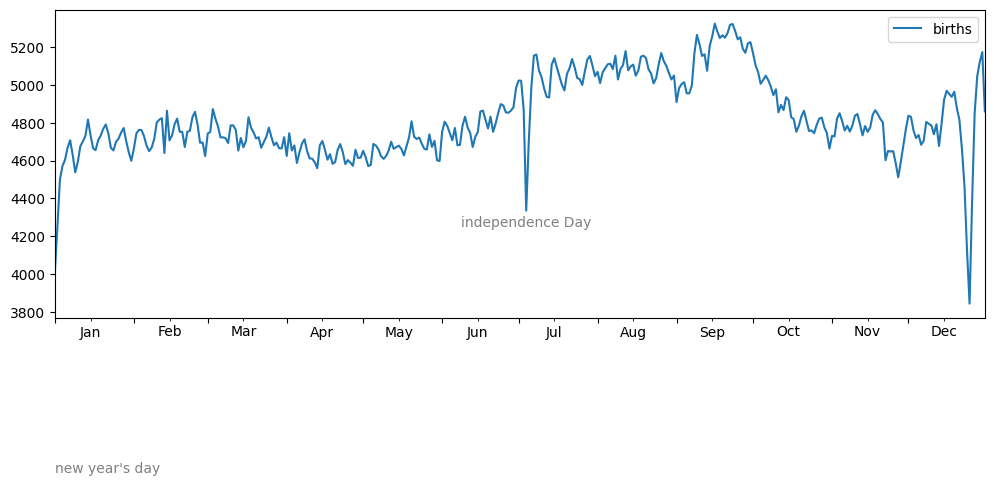

In [29]:
fig,ax =plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

#플롯에 레이블 추가
style=dict(size=10, color='gray')

ax.text('2012-1-1',2950,"new year's day", **style)
ax.text('2012-7-4',4250,"independence Day", ha='center', **style)
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


#### 변환 및 텍스트 위치

텍스트를 독립적으로 고정시킴

In [30]:
ax.transData #데이터 좌표와 관련된 변환
ax.transAxes #축과관련된 벼환(축 차원의 단위로)
fig.transFigure #그림과 관련된 변환(그림 차원의 단위로)

Text(0.2, 0.2, '.Figure: (0.2,0.2)')

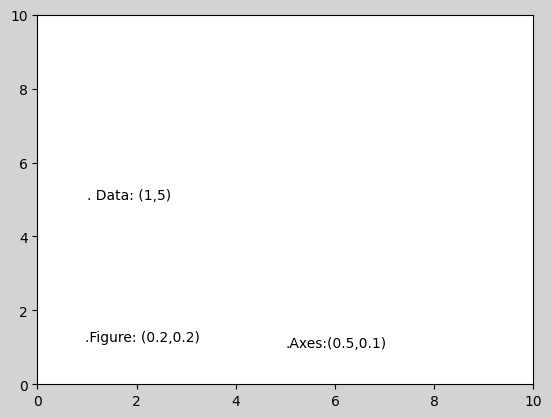

In [34]:
fig, ax= plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

#transform=ax.transData가 기본값이지만 그래도 직접 지정
ax.text(1,5, ". Data: (1,5)", transform=ax.transData)
ax.text(0.5, 0.1, ".Axes:(0.5,0.1)", transform=ax.transAxes)
ax.text(0.2,0.2, ".Figure: (0.2,0.2)", transform=fig.transFigure)

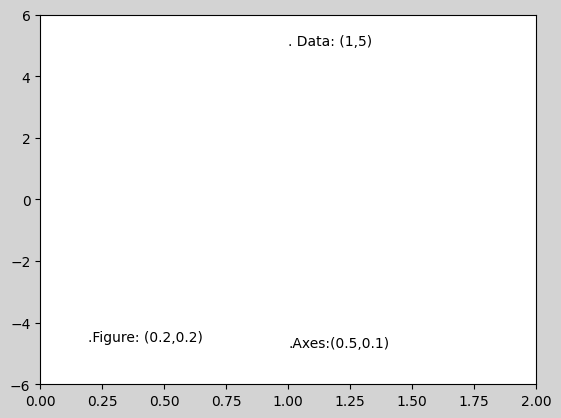

In [36]:
#영향을 미치는 것은 transData만!
ax.set_xlim(0,2)
ax.set_ylim(-6,6)
fig

#### 화살표와 주석
-> plt.annotate()

Text(2, -6, 'local minimum')

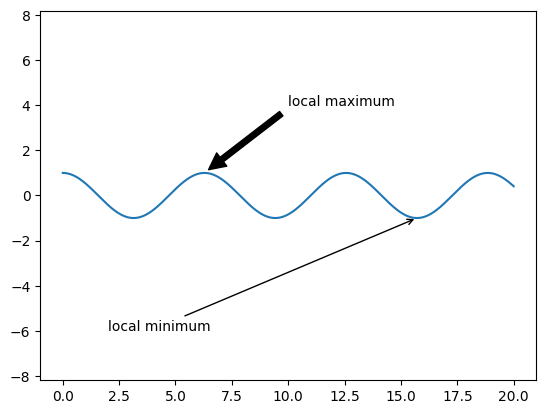

In [37]:
fig, ax = plt.subplots()

x=np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28,1), xytext=(10,4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5*np.pi,-1), xytext=(2,-6), arrowprops=dict(arrowstyle='->' ))

#### 눈금 맞춤 변경하기

axes는 xaxis와 yaxis 속성을 가지고 있으며 이 속성은 다시 축을 구성하는 선, 눈금, 레이블의 모든 특성을 포함하는 속성 가진다.

#### 주 눈금과 보조 눈금 -> log차트 활용

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


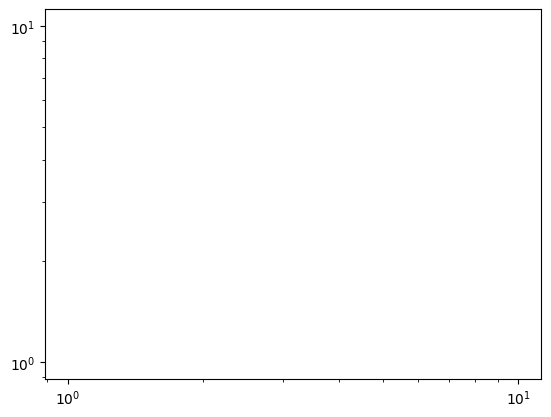

In [42]:
import matplotlib.pyplot as plt
plt.style.use('default')
ax=plt.axes(xscale='log', yscale='log')

#### 눈금 또는 레이블 숨기기

AttributeError: 'Axes' object has no attribute 'xasis'

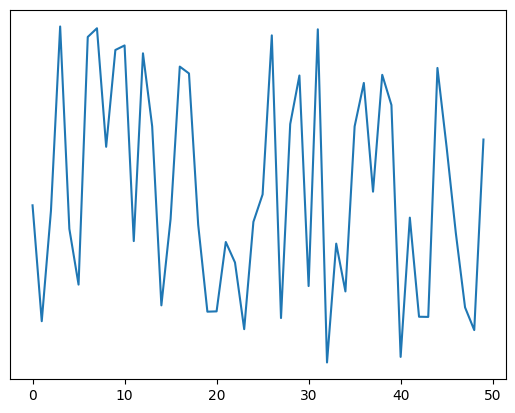

In [43]:
ax= plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xasis.set_major_formatter(plt.NullFormatter())

#### 팬시 눈금 포맷

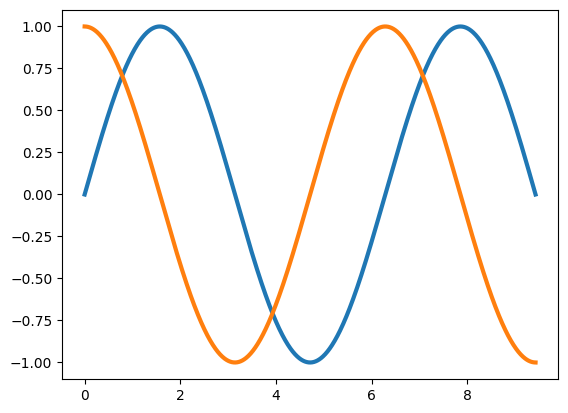

In [47]:
fig,ax =plt.subplots()
x=np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x), lw=3, label='Sine')
ax.plot(x,np.cos(x),lw=3, label='Cosine')

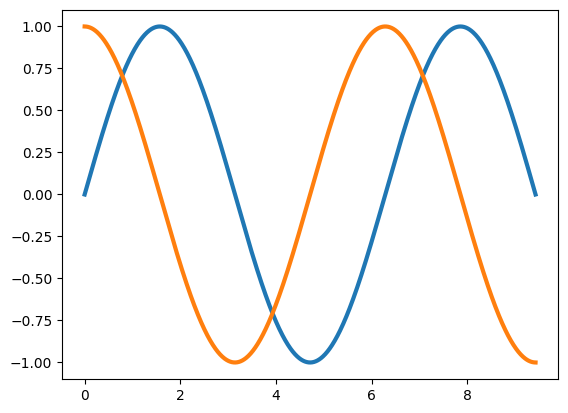

In [46]:
def format_func(value, tick_number):
    N=int(np.round(2*value/np.pi))
    if N ==0:
        return "0"
    elif N==1:
        return r"$\pi/2$"
    elif N ==2:
        return r"$\pi/2$"
    elif N%2>0:
        return r"${0}\pi/2$".forma(N)
    else: return r"${0}\pi$".format(N//2)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

#### 위치 지시자와 서식 지시자 요약

NullFormatter: 눈금 레이블이 없음
IndexFormatter: 레이블 목록에서 문자열을 설정함
FixedFOrmatter: 레이블에 직접 문자열을 설정함
FuncFormatter: 사용자 정의 함수가 레이블을 설정함
FormatStrFormatter: 각 값에 대한 포맷 문자열을 사용함
ScalarFormatter: (기본설정) 스칼라 값에 대한 포맷 지시자
LogFormatter: 로그 축에 대한 기본 포맷 지시자

### Matplotlib 맞춤변경하기: 설정과 스타일시트

#### 기본값 변경하기: rcParams

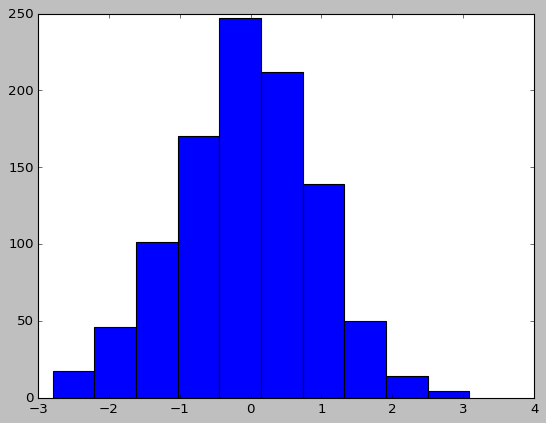

In [49]:
import matplotlib.pyplot as pit
pit.style.use('classic')
import numpy as np
%matplotlib inline
x=np.random.randn(1000)
plt.hist(x);

(array([ 17.,  46., 101., 170., 247., 212., 139.,  50.,  14.,   4.]),
 array([-2.79344668, -2.2054103 , -1.61737392, -1.02933754, -0.44130117,
         0.14673521,  0.73477159,  1.32280797,  1.91084435,  2.49888073,
         3.08691711]),
 <BarContainer object of 10 artists>)

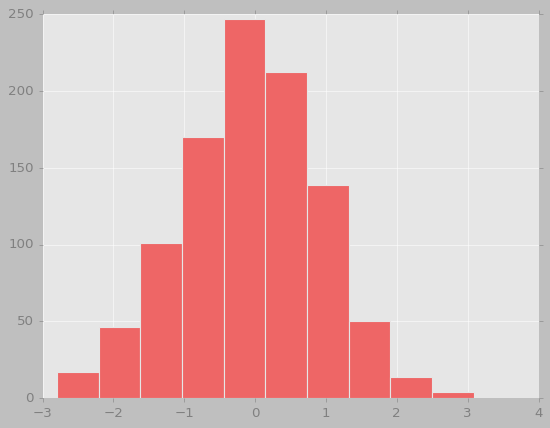

In [64]:
IPython_default=plt.rcParams.copy()
from matplotlib import cycler
colors = cycler('color',
['#EE6666', '#338888', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
pit.rc('axes',facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
pit.rc('grid', color='w', linestyle='solid')
plt.rc('xtick',direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
pit.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.hist(x)

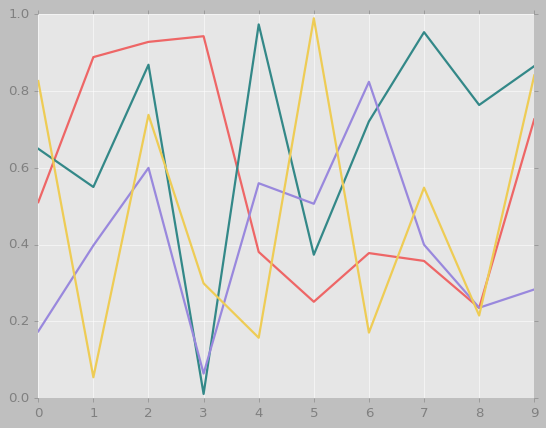

In [65]:
for i in range(4):
    plt.plot(np.random.rand(10))

#### 스타일 시트


In [70]:
def hist_and_lines():
    np.random.seed(0)
    fig,ax=plt.subplots(1,2,figsize=(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1],plot(np.random.rand(10))
    ax[1].legend(['a','b','c'],loc='lower left')

### Matplotlib에서 3차원 플로팅하기

In [73]:
from mpl_toolkits import mplot3d

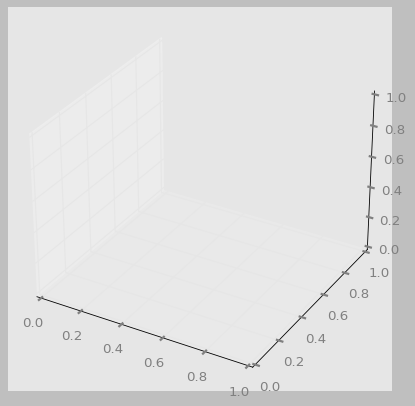

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax=plt.axes(projection='3d')

#### 3차원 점과 선

(x,y,z) 으로 선이나 산점도 만들음
ax.plot3D, ax.scatter3D로 3차원 플롯 만들기


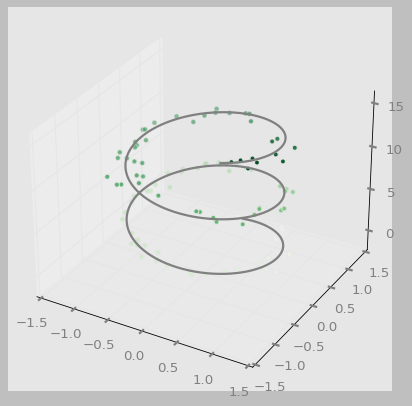

In [82]:
ax=plt.axes(projection='3d')
#3차원 선을 위한 데이터 
zline=np.linspace(0,15,1000)
xline = np.sin(zline)
yline=np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

#3차원 산점도를 위한 데이터
zdata=15*np.random.random(100)
xdata=np.sin(zdata)+0.1*np.random.randn(100)
ydata= np.cos(zdata)+0.1*np.random.randn(100)
ax.scatter3D(xdata,ydata,zdata,c=zdata,cmap='Greens')

Text(0.5, 0, 'z')

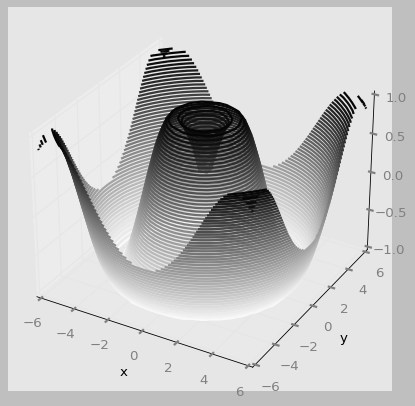

In [86]:
#3차선 등고선 플롯
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y =np.meshgrid(x,y)
Z=f(X,Y)

fig =plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

####  와이어프레임과 표면도

### seaborn을 활용한 시각화

적절한 플롯 스타일과 색상 기본값 제공하고 일반적인 통계 플롯 유형을 위한 간단한 고차원 함수 정의

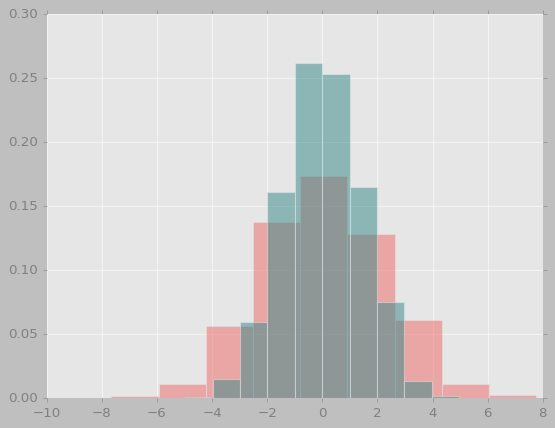

In [88]:
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data=pd.DataFrame(data,columns=['x','y'])
for col in 'xy':
    plt.hist(data[col],density=True, alpha=0.5)

### 페어 플롯

In [91]:
import seaborn as sns

In [92]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 다면 히스토그램

In [93]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 범주형 플롯

C:\Users\JS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\JS\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


NameError: name 'axis' is not defined

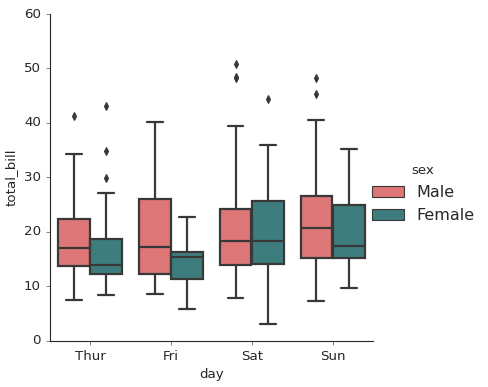

In [96]:
with sns.axes_style(style='ticks'):
    g=sns.catplot(x='day', y='total_bill', hue="sex", data=tips, kind="box")
    g.set+axis+labels('Day',"Total Bill")